In [1]:
from tqdm import tqdm
import torch
from torch import Tensor
import numpy as np
from jaxtyping import Int, Float
from typing import List, Optional, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd
from tqdm import tqdm
from einops import repeat
import multiprocessing
import sys

from DSA.dmd import DMD
from DSA.simdist import SimilarityTransformDist
from sklearn.manifold import MDS

sys.path.append('../')
from models import get_model_from_name
from data import get_wikitext_103_sample
from activations import get_residual_stream_activations_for_layer_wise_dmd
from dmd import apply_dmd

torch.set_grad_enabled(True)

# List all available GPUs
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")

else:
    print("CUDA is not available. Listing CPUs instead.")
    print(multiprocessing.cpu_count())

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ImportError: cannot import name 'get_wikitext_103_sample' from 'data' (/scratch2/jsalle/DSA/data.py)

In [ ]:
models_names = ['pythia-2.8b'] #['gpt2-small', 'gpt2-medium', 'pythia-70m', 'pythia-1b', 'pythia-2.8b', 'bert-base-uncased']
models = []
model_types = []

for i, model_name in enumerate(models_names):
    models, model_types = get_residual_stream_activations_for_layer_wise_dmd(model_name,
                                                                             models,
                                                                             model_types,
                                                                             n_samples=3)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['= The Otto Show =\n"The Otto Show" is the twenty-second episode of The Simpsons\' third season. It first aired on the Fox network in the United States on April 23, 1992. In the episode, Bart decides that he wants to become a rock star after attending a Spinal Tap concert, so Homer and Marge buy him a guitar. He shows the guitar to Otto the bus driver, who plays it and consequently makes the children late for school. Racing to Springfield Elementary, Otto crashes the school bus and is suspended until he can get his license back. Bart, who respects Otto, invites him to move in with the Simpson family.\nThe episode was written by Jeff Martin and directed by Wes Archer. It was the first episode of the show to feature Otto Mann in a prominent role. "The Otto Show" features an appearance from Spinal Tap, a parody band that first appeared in the 1984 mockumentary film This Is Spinal Tap. The episode guest stars Michael McKean as David St. Hubbins and Christopher Guest as Nigel Tufnel. Harry

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
H torch.Size([4368, 38400])
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
H torch.Size([4368, 38400])
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
H torch.Size([4368, 38400])
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
H torch.Size([4368, 38400])
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complete! 

Computing Hankel matrix ...
Hankel matrix computed!
Computing SVD on Hankel matrix ...
H torch.Size([4368, 38400])
SVD complete!
Computing least squares fits to HAVOK DMD ...
Least squares complet

/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

Saved DMD MDS at: ../figures/pythia-2.8b_2samples_wikitext-103_mds.png


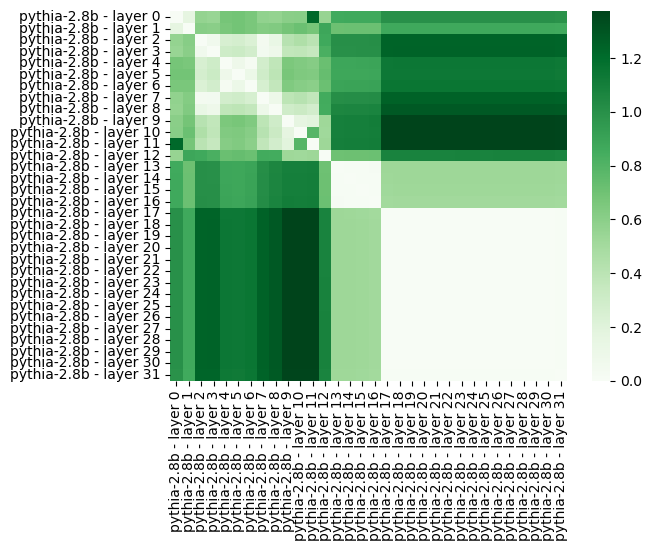

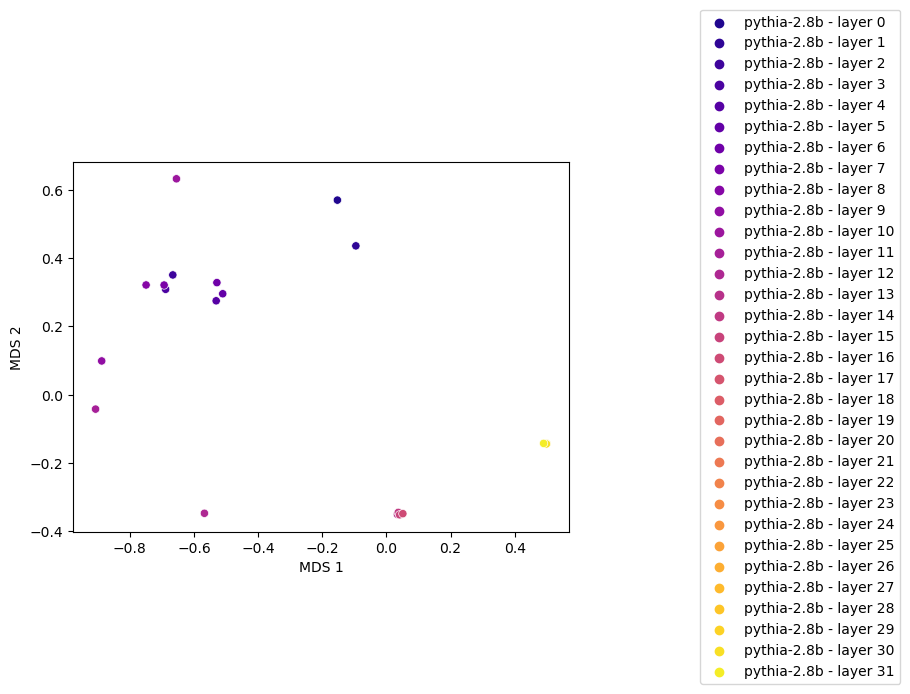

In [ ]:
sims_dmd, model_types, mds_df = apply_dmd(models, 
                                  model_types, 
                                  device=device,
                                  fig_file_name='pythia-2.8b_3samples_wikitext-103')

In [47]:
architectures = []
layers = []

for index, row in mds_df.iterrows():
    architectures.append(row['Model Type'].rsplit(' -')[0])
    layers.append(int(row['Model Type'].rsplit('layer ')[1]))

mds_df['Architecture'] = architectures
mds_df['Layer'] = layers
mds_df

,Model Type,DMD:0,DMD:1,Architecture,Layer
0,pythia-14m - layer 0,0.142414,-0.377293,pythia-14m,0
1,pythia-14m - layer 1,0.096191,-0.113576,pythia-14m,1
2,pythia-14m - layer 2,-0.154431,0.053843,pythia-14m,2
3,pythia-14m - layer 3,-0.247504,0.126716,pythia-14m,3
4,pythia-14m - layer 4,-0.182962,0.470755,pythia-14m,4
5,pythia-14m - layer 5,0.346292,-0.160446,pythia-14m,5


In [37]:
import plotly.express as px

fig = px.scatter(mds_df, 
                 x="DMD:0", 
                 y="DMD:1", 
                 color="Architecture",
                 title="",
                 labels={
                     "DMD:0": "DMD (dim 0)",
                     "DMD:1": "DMD (dim 1)",
                     "Layer": "Layer"
                 },)
fig.show()

In [48]:
fig = px.scatter(mds_df, x="DMD:0", y="DMD:1", color='Layer', symbol='Architecture')
fig.show()

In [4]:
models_names = ['Mistral-7'] #['gpt2-small', 'gpt2-medium', 'pythia-70m', 'pythia-1b', 'pythia-2.8b', 'bert-base-uncased']
models = []
model_types = []

for i, model_name in enumerate(models_names):
    models, model_types = get_residual_stream_activations_for_layer_wise_dmd(model_name,
                                                                             models,
                                                                             model_types,
                                                                             n_samples=1)
    
sims_dmd, model_types, mds_df = apply_dmd(models, 
                                  model_types, 
                                  device=device,
                                  n_delays=15,
                                  rank=5,
                                  fig_file_name='mistral-7b_wikitext-103')

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_1086785/231971561.py", line 6, in <module>
    models, model_types = get_residual_stream_activations_for_layer_wise_dmd(model_name,
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/scratch2/jsalle/DSA/activations.py", line 61, in get_residual_stream_activations_for_layer_wise_dmd
  File "/scratch2/jsalle/DSA/models.py", line 42, in get_model_from_name
    def get_model_from_name(model_name: str):
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: Unsupported model: Mistral-7.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/jsalle/.conda/envs/p11/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2144, in showtr

In [ ]:
mds_df.to_pickle("../data/mistral-7b_wikitext-103.pkl")